<a href="https://colab.research.google.com/github/uk-zash/Deep-Learning/blob/main/Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import torch
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
print(torch.__version__)

2.4.0+cu121


# Creating Tensors

In [88]:
scalar = torch.tensor(7)
scalar

tensor(7)

In [89]:
scalar.ndim

0

In [90]:
scalar.item()

7

In [91]:
torch.tensor([1 , 2, 3])

tensor([1, 2, 3])

In [92]:
vector = torch.tensor([1,2,4])
print(vector.ndim)

1


In [93]:
vector.shape

torch.Size([3])

In [94]:
matrix = torch.tensor([[1,2,3] ,
                       [3,2,1]])
print(matrix.ndim)

2


In [95]:
matrix.shape

torch.Size([2, 3])

In [96]:
tensor = torch.tensor([[[1 , 2] ,
                        [1 , 2],
                        [1 , 3]]])

print(tensor.ndim)

3


In [97]:
tensor.shape

torch.Size([1, 3, 2])

# Random Tensors

Random tensors are importand because the way many neural networks learn is that they start with tenosrs full of random numbers then adjust those ranodm numbers to better represent the data

In [98]:
random_tensor = torch.rand(2 , 3 ,4)
random_tensor

tensor([[[0.9162, 0.1961, 0.9768, 0.1987],
         [0.0681, 0.4567, 0.7980, 0.6006],
         [0.5850, 0.1066, 0.8871, 0.2191]],

        [[0.1188, 0.1484, 0.4418, 0.1314],
         [0.5577, 0.4621, 0.4161, 0.7095],
         [0.1050, 0.5661, 0.7786, 0.6404]]])

In [99]:
random_tensor.shape

torch.Size([2, 3, 4])

For Image

In [100]:
random_image = torch.rand(size = (224 , 224 , 3))

random_image.shape , random_image.ndim

(torch.Size([224, 224, 3]), 3)

# Range


In [101]:
one_to_ten = torch.arange(0 , 10)

In [102]:
torch.zeros_like(input = one_to_ten)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Data Type

In [103]:
# float_32 = torch.tensor([2 , 6 , 9] , dtype =torch.float16,
#                         device = "cuda",
#                         requires_grad = False)
# float_32

In [104]:
# float_32.device

In [105]:
# A = torch.tensor([[1 , 2 , 4],
#                   [1 , 2 , 4]])

# B = torch.tensor([[1 , 2, 4],
#                   [1 , 2 ,4 ]])

# torch.matmul(A , B.T)

In [106]:
# x = torch.tensor([1 , 4 ,23 , 41])

# torch.min(x) , torch.max(x)

In [107]:
# torch.mean(x.type(torch.float32))

In [108]:
# x.argmin()

In [109]:
# x.argmax()

* Reshaping - reshapes an input tensors to a define Shape
* View - Return a view of an input tenosr of certain shape but keep the same memory as the original
* Stacking - Combine multiple tensors on top of each other
* Squeeze - remove all 1 dimension from a tensor
* Unsqueeze - add a 1 dimension to a target tensor
* Permute - Return a view of the input with dimension permuted in a certain way

In [110]:
# y = torch.arange(1. , 11.)
# y

In [111]:
# y_reshape = y.reshape(5 , 2)

In [112]:
# y_reshape

In [113]:
# x_stacked = torch.stack([y , y , y ,y] , dim = 0)
# x_stacked

In [114]:
# squeeze = torch.squeeze(y)

In [115]:
# squeeze.shape

In [116]:
# torch.unsqueeze(y , dim = 0)

In [117]:
# !nvidia-smi

In [118]:
# torch.cuda.is_available()

# Setup


In [119]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

#Count devices

In [120]:
torch.cuda.device_count()

0

In [121]:
# tenosr_on_gpu = y.to(device)
# tenosr_on_gpu

In [122]:
# tenosr_on_gpu.cpu().numpy()

# Pytorch WorkFlow end to end
  -data preparing

  -build model

  -fitting the model to data - Training

  -making predictions and evaluating

  -saving the model and load model

  -Put All Togeather

In [123]:
import torch
from torch import nn # nn contains all of Pytorch's building blocks neural network
import matplotlib.pyplot as plt


torch.__version__


'2.4.0+cu121'

# Data Preparing

## Machine Learning is a game of two parts
  1. Get data into a numercial representation

  2. Build a model to learn patterns in that numerical representation

Create known parameters and use linear regression

In [124]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start , end , step).unsqueeze(dim = 1)
print(X[:10])
y = weight * X + bias



tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])


In [125]:
y[:10]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])

## Splitting data into training and test sets

  - Training Data (60% to 80%) - Always

  - Validation Data  (10% to 20%) - Oftenly

  - Test Data  (10% to 20%) - Always



In [126]:
training_split = int(0.8 * len(X))
X_train , y_train = X[: training_split] , y[:training_split]
X_test , y_test = X[training_split :] , y[training_split :]

len(X_train) , len(y_train)  , len(X_test) , len(y_test)

(40, 40, 10, 10)

## Visualise

In [127]:
def plot_prediction(train_data = X_train , train_labels = y_train ,
                    test_data = X_test ,
                    test_labels = y_test ,
                    predictions = None):
  plt.figure(figsize = (10 , 7))

  plt.scatter(train_data , train_labels , c = "b" , s = 4 , label = "TrainingData")
  plt.scatter(test_data , test_labels , c = "g" , s = 4 , label= "TestData")

  if predictions is not None:
    plt.scatter(test_data , predictions , c = "r" , s = 4 , label = "Predictions")
  plt.legend(prop = {"size" : 14})

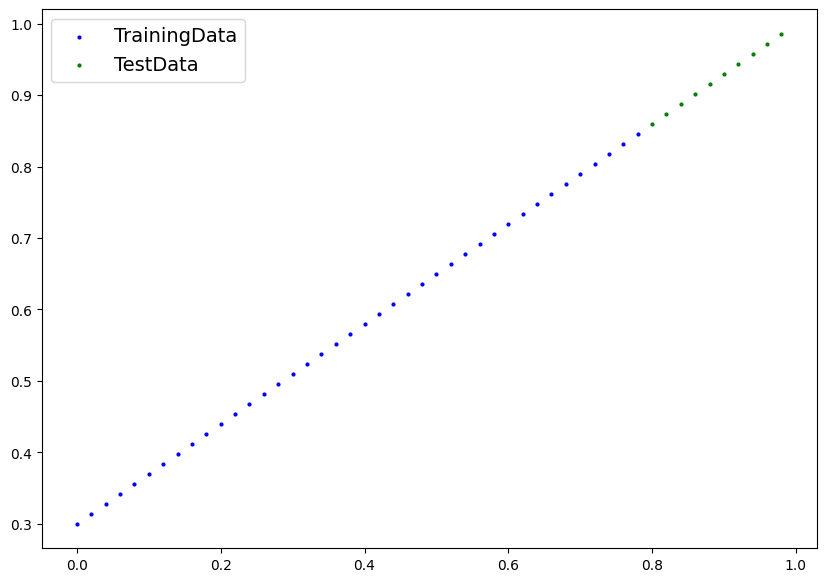

In [128]:
plot_prediction()

## Build Model

In [129]:
from torch import nn
class LinearRegressionModel(nn.Module):  #Almost everything is pytorch inherits from nn.module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1 , requires_grad=True,
                                           dtype = torch.float))
    self.bias = nn.Parameter(torch.rand(1 , requires_grad = True ,
                                        dtype = torch.float))

  def forward( self , x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias




### Pytorch model Builiding Essentials

* torch.nn - contains all of the building for computational graphs
* torch.nn.Paramter - what parameters should model try and learn

* torch.nn.Module - The base class for all neural Network modules

* torch.optim - this is wehre optimizer  in pytorch live

* def forward() - All nn.Module subclass require you to overwrite forward(), this method defines what happens in forward computation



In [132]:
torch.manual_seed(42)

model0 = LinearRegressionModel()
list(model0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [133]:
model0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [136]:
inputs = torch.tensor([0.3 , 0.5 ,0.6] , dtype = torch.float)

model0.forward(inputs)

tensor([1.1797, 1.3561, 1.4444], grad_fn=<AddBackward0>)

In [139]:
with torch.inference_mode():
  y_preds = model0(X_test)

# with torch.no_grad():

y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

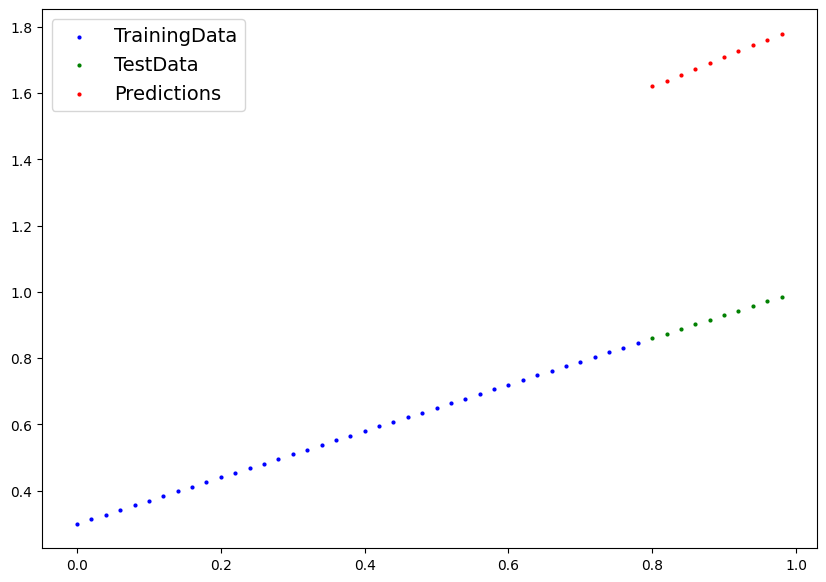

In [142]:
plot_prediction(predictions = y_preds)

In [143]:
## Loss Function

loss_fn = nn.L1Loss()

loss = loss_fn(y_preds , y_test)
loss

tensor(0.7772)

In [ ]:
## Optimizer
optimizer = torch.optim.SGD(model0.parameters() , lr = 0.01)
